In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import io, draw

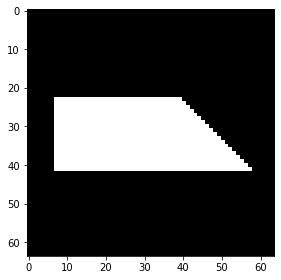

In [2]:
img = io.imread("./polygon.png")
io.imshow(img)

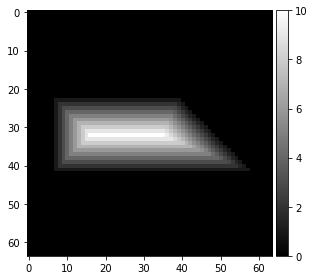

In [3]:
img_bf = ndimage.distance_transform_bf(img)
io.imshow(img_bf, cmap="gray")

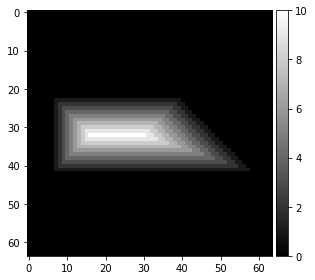

In [4]:
img_cdt = ndimage.distance_transform_cdt(img)
io.imshow(img_cdt, cmap="gray")

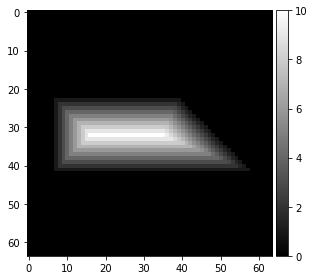

In [5]:
img_edt = ndimage.distance_transform_edt(img)
io.imshow(img_edt, cmap="gray")

## Indexes of the maximal elements of a N-dimensional array:
> See `help(np.argmax)`.
```python
>>> ind = np.unravel_index(np.argmax(a, axis=None), a.shape)
>>> ind
(1, 2)
>>> a[ind]
15
```

32 16


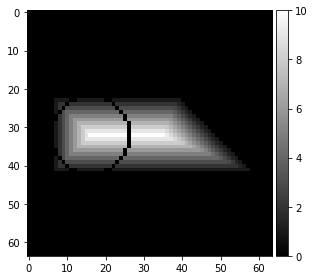

In [6]:
row, col = np.unravel_index(np.argmax(img_bf, axis=None), img_bf.shape)
print(row, col)
radius = img_bf[row, col]
rr, cc = draw.circle_perimeter(row, col, round(radius))
_img = img_bf.copy()
draw.set_color(_img, [rr, cc], 0)
io.imshow(_img, cmap="gray")

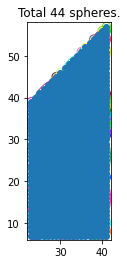

In [7]:
_img = img_bf.copy()
center, radii = [], []
while _img.max() > 0:
    row, col = np.unravel_index(np.argmax(_img, axis=None), img_bf.shape)
    center.append([row, col])
    radius = _img[row, col]
    radii.append(radius)
    rr, cc = draw.circle(row, col, round(radius))
    draw.set_color(_img, [rr, cc], 0)

center = np.array(center)
radii = np.array(radii)
fig, ax = plt.subplots()
ax.plot(*np.nonzero(img_bf), 'o')
for c, r in zip(center, radii):
    ax.add_artist(plt.Circle(c, r, fill=False, color=np.random.rand(3)))
ax.set(xlim=((center[:, 0]-radii).min(), (center[:, 0]+radii).max()),
        ylim=((center[:, 1]-radii).min(), (center[:, 1]+radii).max()),
        title=f"Total {len(radii)} spheres.")
# plt.axis("equal")
ax.set_aspect(1)